# Imports

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

 # Data

In [3]:
df_train = pd.read_csv(
    'D:/OP/P8/jigsaw-toxic-comment-classification-challenge/train.csv')

In [4]:
df_train.shape

(159571, 8)

In [5]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df_train.toxic.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [9]:
df_train.severe_toxic.value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [10]:
df_train.obscene.value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [11]:
df_train.threat.value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [12]:
df_train.insult.value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [13]:
df_train.identity_hate.value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

# Wordclouds

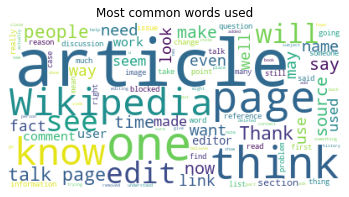

In [17]:
from wordcloud import WordCloud
# Wordcloud of words used in general
wordcloud1 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(df_train.comment_text))
plt.imshow(wordcloud1)
plt.title('Most common words used')
plt.axis("off")
plt.show()

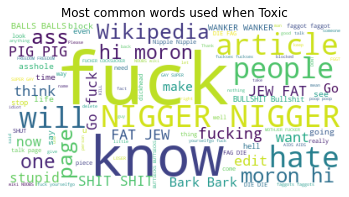

In [18]:
# wordcloud for toxic comments
df_toxic = df_train.loc[df_train.toxic == 1]
wordcloud2 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(df_toxic.comment_text))
plt.imshow(wordcloud2)
plt.title('Most common words used when Toxic')
plt.axis("off")
plt.show()

We can see that some words are swear words: fuck, ass, shit; but there are also words of racism: jew, moron,fat.

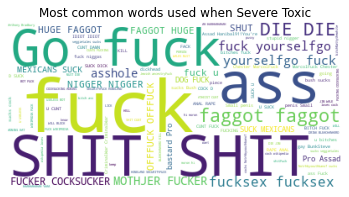

In [19]:
# wordcloud for severe toxic comments
df_severe_toxic = df_train.loc[df_train.severe_toxic == 1]
wordcloud3 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(df_severe_toxic.comment_text))
plt.imshow(wordcloud3)
plt.title('Most common words used when Severe Toxic')
plt.axis("off")
plt.show()

We can see a lot of words in uppercases and most of the words are insults.

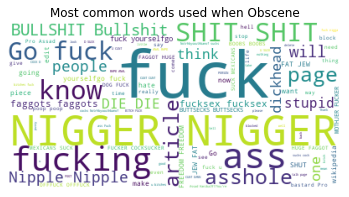

In [20]:
# wordcloud for obscene comments
df_obscene = df_train.loc[df_train.obscene == 1]
wordcloud4 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(df_obscene.comment_text))
plt.imshow(wordcloud4)
plt.title('Most common words used when Obscene')
plt.axis("off")
plt.show()

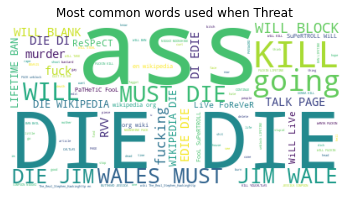

In [21]:
# wordcloud for toxic comments
df_threat = df_train.loc[df_train.threat == 1]
wordcloud5 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(df_threat.comment_text))
plt.imshow(wordcloud5)
plt.title('Most common words used when Threat')
plt.axis("off")
plt.show()

We can see the vocabulary of murder with kill, die, murder ...

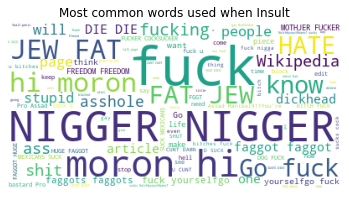

In [23]:
# wordcloud for insult comments
df_insult = df_train.loc[df_train.insult == 1]
wordcloud6 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(df_insult.comment_text))
plt.imshow(wordcloud6)
plt.title('Most common words used when Insult')
plt.axis("off")
plt.show()

We can see some vocabulary of racism: nigger, moron, jew, fat plus the verb hate.

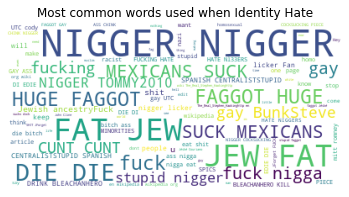

In [24]:
df_identity_hate = df_train.loc[df_train.identity_hate == 1]
wordcloud7 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(df_identity_hate.comment_text))
plt.imshow(wordcloud7)
plt.title('Most common words used when Identity Hate')
plt.axis("off")
plt.show()

## Length

In [4]:
df_train['len'] = df_train.comment_text.apply(len)

In [29]:
df_train.len.describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: len, dtype: float64

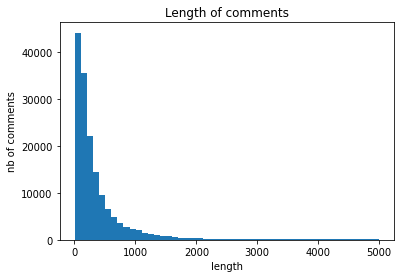

In [32]:
plt.title('Length of comments')
plt.hist(df_train.len, bins=50)
plt.xlabel('length')
plt.ylabel('nb of comments')
plt.show()

We can see that most of the comments are not very long with less than 500 characters but some are very long with up to 5000 characters. Let's see if this is correlated to toxicity.

In [5]:
df_train.loc[df_train[['toxic', 'severe_toxic', 'insult', 'threat',
                       'identity_hate', 'obscene']].sum(axis=1) == 0, 'nothing'] = 1

<AxesSubplot:xlabel='len', ylabel='Count'>

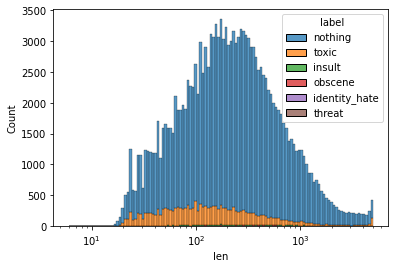

In [18]:
import seaborn as sns
sns.histplot(data=df_train, x='len', hue='label',
             multiple='stack', log_scale=True)

When we plot the length of the comment according to the toxicity we can see that there is not a huge diffference but the distribution don't have the same mean. Indeed, the distribution of toxic comments seems to have a smaller mean than the distribution of non toxic comments.

# Cleaning

In [6]:
df_train['label'] = df_train[['toxic', 'severe_toxic', 'insult',
                              'threat', 'identity_hate', 'obscene', 'nothing']].idxmax(axis=1)

Lets clean a little the comments. 

In [7]:
df_train.comment_text.replace(
    to_replace='\n', value=' ', regex=True, inplace=True)

In [8]:
df_train.comment_text.replace(
    to_replace='I', value=' ', regex=True, inplace=True)

In [9]:
# https://www.kaggle.com/serquet/simple-lgbm-tfidf-svd-eda-useful-dataset-jigsaw
def clean_text(text):
    text = re.sub(r'<[^<]+?>', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'<[^<]+?>', '', text)
    text = text.replace('(\xa0)', ' ')
    text = text.replace('(&lt)', '')
    text = text.replace('(&gt)', '')
    text = text.replace("\\", "")
    return text

In [10]:
df_train['text_clean'] = df_train.comment_text.apply(clean_text)

In [13]:
df_train.comment_text[10]

'" Fair use rationale for  mage:Wonju.jpg  Thanks for uploading  mage:Wonju.jpg.   notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use.  n addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.  Please go to the image description page and edit it to include a fair use rationale.   f you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting "" mage"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such an expla

In [14]:
df_train.text_clean[10]

'" Fair use rationale for mage:Wonju.jpg Thanks for uploading mage:Wonju.jpg. notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. n addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use. Please go to the image description page and edit it to include a fair use rationale. f you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting "" mage"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such an explanation wi

### Uppercase words

In [11]:
# count the number of uppercases words in each comment
df_train['nb_upper'] = df_train.comment_text.apply(
    lambda x: sum([1 for w in x.split(' ') if w.isupper()]))

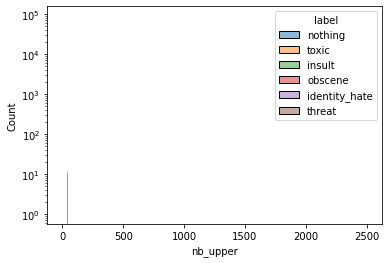

In [46]:
sns.histplot(data=df_train, x='nb_upper', hue='label')
plt.yscale('log')
plt.show()

In [41]:
df_train.nb_upper.describe()

count    159571.000000
mean          2.158168
std          26.763685
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        2500.000000
Name: nb_upper, dtype: float64

### Correlations

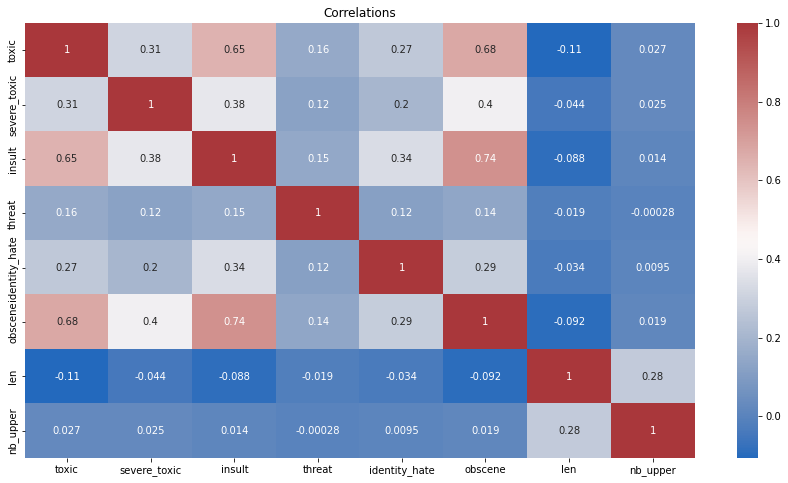

In [49]:
# plot correlations to see if there is a link between toxicity and length or number of uppercase
df2 = df_train[['toxic', 'severe_toxic', 'insult', 'threat',
                'identity_hate', 'obscene', 'len', 'nb_upper']]
corr = df2.corr(method='kendall')

fig = plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='vlag')
plt.title('Correlations')
plt.show()

We can see that it seems to have no correlation between length of comment, number of uppercase and toxicity

# N grams

This section is inspired by the work of Martina Fumanelli <br>
https://www.kaggle.com/serquet/simple-lgbm-tfidf-svd-eda-useful-dataset-jigsaw

In [12]:
def get_top_n_words(corpus, n=None, remove_stop_words=False, n_words=1):
    """ get the top ngrams of a corpus """
    if remove_stop_words:
        vec = CountVectorizer(stop_words='english',
                              ngram_range=(n_words, n_words)).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=(n_words, n_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

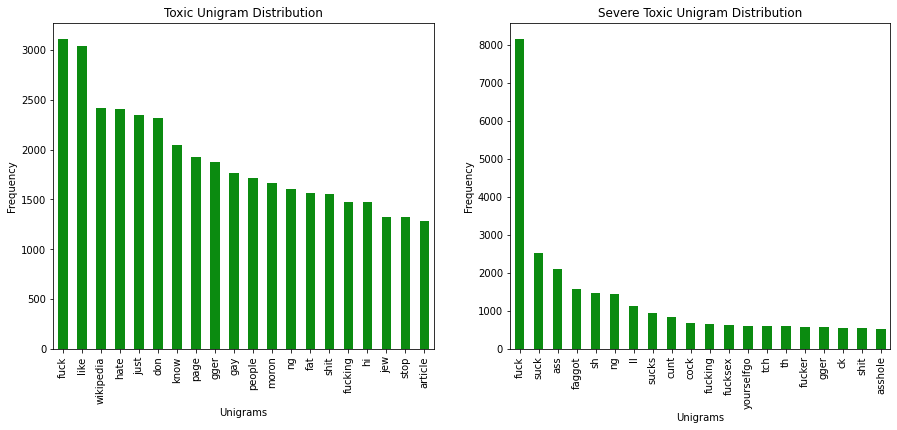

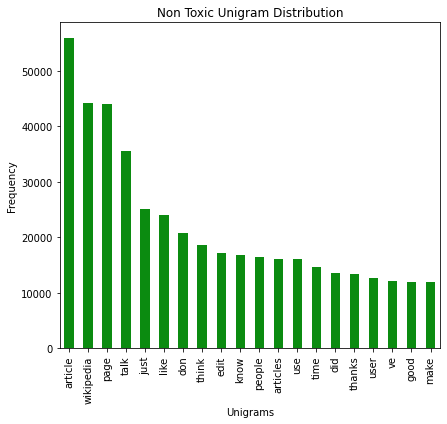

In [19]:
# Plot the top Unigrams for non toxic, toxic and severe toxic
text_no_toxic = df_train[df_train.toxic+df_train.severe_toxic+df_train.obscene +
                         df_train.threat+df_train.insult+df_train.identity_hate == 0].text_clean.values
text_toxic = df_train[(df_train.toxic == 1) & (
    df_train.severe_toxic == 0)].text_clean.values
text_severe_toxic = df_train[(df_train.toxic == 1) & (
    df_train.severe_toxic == 1)].text_clean.values


common_words_non_toxic = get_top_n_words(
    text_no_toxic, 20, remove_stop_words=True, n_words=1)
common_words_toxic = get_top_n_words(
    text_toxic, 20, remove_stop_words=True, n_words=1)
common_words_severe_toxic = get_top_n_words(
    text_severe_toxic, 20, remove_stop_words=True, n_words=1)

df_tmp_non_toxic = pd.DataFrame(
    common_words_non_toxic, columns=['text', 'count'])
df_tmp_toxic = pd.DataFrame(common_words_toxic, columns=['text', 'count'])
df_tmp_severe_toxic = pd.DataFrame(
    common_words_severe_toxic, columns=['text', 'count'])

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
ax1 = df_tmp_toxic.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', color="#0b8b10")
ax1.set_title('Toxic Unigram Distribution')
ax1.set_xlabel("Unigrams")
ax1.set_ylabel("Frequency")

ax2 = fig.add_subplot(122)
ax2 = df_tmp_severe_toxic.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', color="#0b8b10")
ax2.set_title('Severe Toxic Unigram Distribution')
ax2.set_xlabel("Unigrams")
ax2.set_ylabel("Frequency")

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
ax1 = df_tmp_non_toxic.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', color="#0b8b10")
ax1.set_title('Non Toxic Unigram Distribution')
ax1.set_xlabel("Unigrams")
ax1.set_ylabel("Frequency")

plt.show()

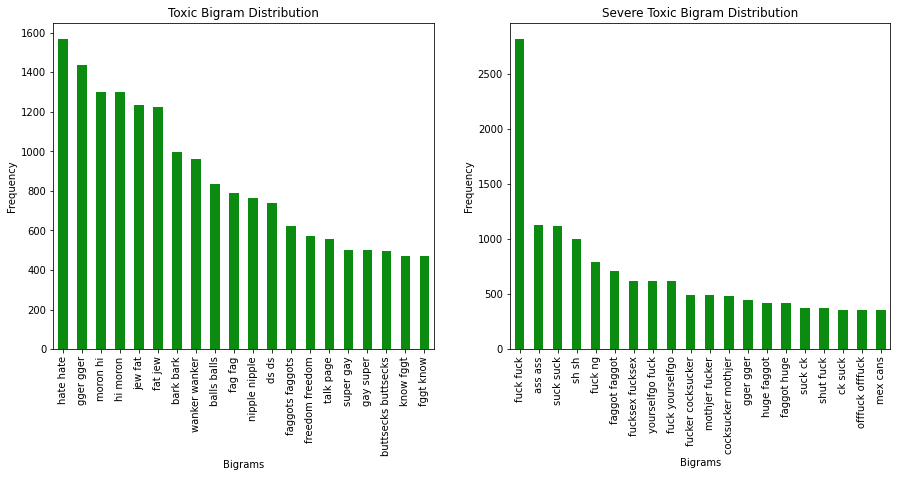

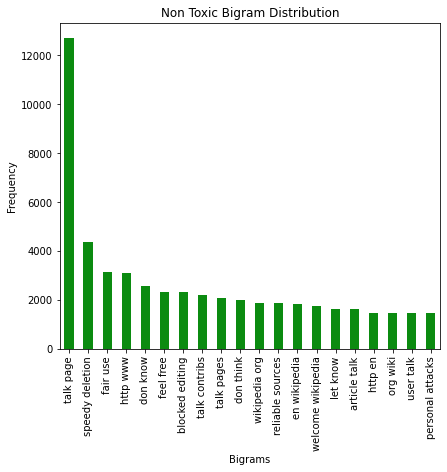

In [20]:
# Plot the top bi-grams 
common_bigrams_non_toxic = get_top_n_words(
    text_no_toxic, 20, remove_stop_words=True, n_words=2)
common_bigrams_toxic = get_top_n_words(
    text_toxic, 20, remove_stop_words=True, n_words=2)
common_bigrams_severe_toxic = get_top_n_words(
    text_severe_toxic, 20, remove_stop_words=True, n_words=2)

df_tmp_non_toxic = pd.DataFrame(
    common_bigrams_non_toxic, columns=['text', 'count'])
df_tmp_toxic = pd.DataFrame(common_bigrams_toxic, columns=['text', 'count'])
df_tmp_severe_toxic = pd.DataFrame(
    common_bigrams_severe_toxic, columns=['text', 'count'])

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
ax1 = df_tmp_toxic.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', color="#0b8b10")
ax1.set_title('Toxic Bigram Distribution')
ax1.set_xlabel("Bigrams")
ax1.set_ylabel("Frequency")

ax2 = fig.add_subplot(122)
ax2 = df_tmp_severe_toxic.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', color="#0b8b10")
ax2.set_title('Severe Toxic Bigram Distribution')
ax2.set_xlabel("Bigrams")
ax2.set_ylabel("Frequency")

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
ax1 = df_tmp_non_toxic.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', color="#0b8b10")
ax1.set_title('Non Toxic Bigram Distribution')
ax1.set_xlabel("Bigrams")
ax1.set_ylabel("Frequency")

plt.show()

# Sentiment analysis

This section is also from Martina Fumanelli <br>
https://www.kaggle.com/serquet/simple-lgbm-tfidf-svd-eda-useful-dataset-jigsaw

In [1]:
from textblob import TextBlob

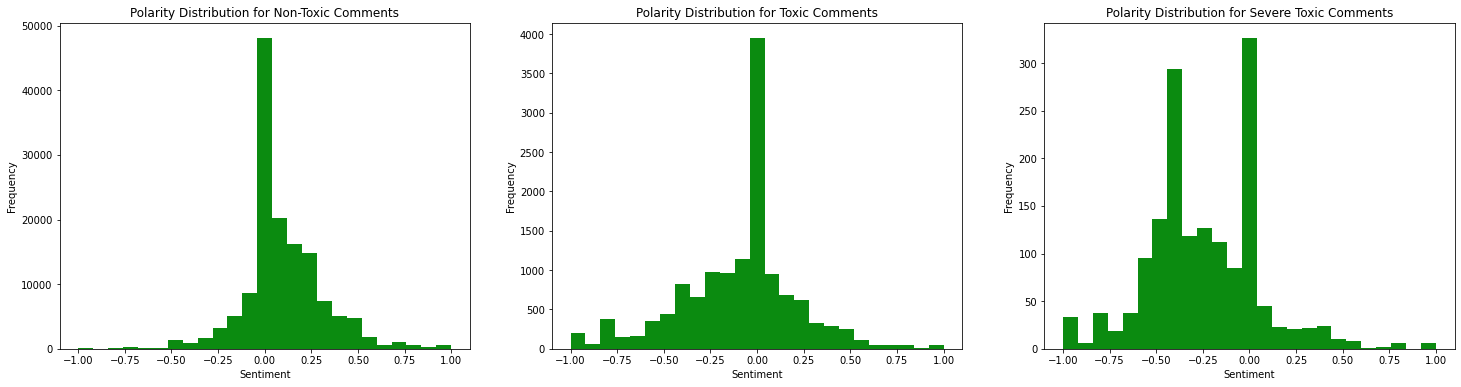

In [14]:
# see the polarity of non-toxic, toxic and severe toxic comments
polarity_toxic_not_severe = df_train[(df_train.toxic == 1) & (
    df_train.severe_toxic == 0)]['comment_text'].map(lambda text: TextBlob(text).sentiment.polarity)
polarity_severe_toxic = df_train[df_train.severe_toxic == 1]['comment_text'].map(
    lambda text: TextBlob(text).sentiment.polarity)
polarity_non_toxic = df_train[(df_train.toxic+df_train.severe_toxic+df_train.obscene+df_train.threat+df_train.insult +
                               df_train.identity_hate == 0)]['comment_text'].map(lambda text: TextBlob(text).sentiment.polarity)

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 6))
ax1, ax2, ax3 = axes.flatten()

ax1.hist(polarity_non_toxic, color="#0b8b10", bins=25)
ax1.set_title('Polarity Distribution for Non-Toxic Comments')
ax1.set_xlabel("Sentiment")
ax1.set_ylabel("Frequency")

ax2.hist(polarity_toxic_not_severe,  color="#0b8b10", bins=25)
ax2.set_title('Polarity Distribution for Toxic Comments')
ax2.set_xlabel("Sentiment")
ax2.set_ylabel("Frequency")

ax3.hist(polarity_severe_toxic, color="#0b8b10", bins=25)
ax3.set_title('Polarity Distribution for Severe Toxic Comments')
ax3.set_xlabel("Sentiment")
ax3.set_ylabel("Frequency")

plt.show()

We can see that non toxic comments are more positives than negatives. Toxic are equally distributed between positives and negatioves. And finally severe toxic are more negatives but a lot are neutral with a polarity of 0.

# Validation data

In [15]:
validation_data = pd.read_csv(
    'D:/OP/P8/jigsaw-toxic-severity-rating/validation_data.csv')

In [16]:
validation_data

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"
...,...,...,...
30103,461,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30104,527,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30105,352,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook
30106,311,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook


In [22]:
from wordcloud import WordCloud

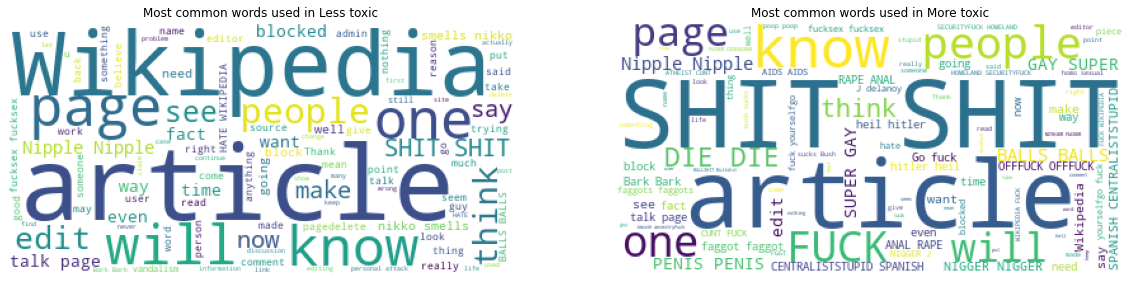

In [29]:
# see most common words in the validation data
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
wordcloud8 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(validation_data.less_toxic))
plt.imshow(wordcloud8)
plt.title('Most common words used in Less toxic')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud9 = WordCloud(background_color='white', max_words=100).generate(
    ' '.join(validation_data.more_toxic))
plt.imshow(wordcloud9)
plt.title('Most common words used in More toxic')
plt.axis("off")
plt.show()

We can see that we have more bad words in the more toxic comments. 

# Evaluation data

In [17]:
comments_to_score = pd.read_csv(
    'D:/OP/P8/jigsaw-toxic-severity-rating/comments_to_score.csv')

In [18]:
comments_to_score

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...
...,...,...
7532,504235362,"Go away, you annoying vandal."
7533,504235566,This user is a vandal.
7534,504308177,""" \n\nSorry to sound like a pain, but one by f..."
7535,504570375,Well it's pretty fucking irrelevant now I'm un...


In [19]:
pd.read_csv('D:/OP/P8/jigsaw-toxic-severity-rating/sample_submission.csv')

,comment_id,score
0,114890,0.5
1,732895,0.5
2,1139051,0.5
3,1434512,0.5
4,2084821,0.5
...,...,...
7532,504235362,0.5
7533,504235566,0.5
7534,504308177,0.5
7535,504570375,0.5
